## Import the following packages: 

In [1]:

import numpy  as np    #for numerical computation
from glob import glob  #for reading files
from scipy.io import loadmat  #for loading .mat files from matlab (loading a,b for the butter filter)


from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt                 #visualization  of audio files amplitude, It provides a MATLAB-like way of plotting.
                         
from math import pi
import librosa as lr 
             
from scipy import signal
import math 
from scipy.signal import filtfilt
import numpy.ma as ma 
import numpy as np 

## set the path of wav. files 

 call the file from the folder (set the path of the folder). use glob to call the wav file load the file [number of file]. Audio variable represent the data of the file, in terms of amplitude and [sfreq] variable represent the Nyquist frequency which is half 1/2 of sampling frequency. 

In [2]:
pathname = '/2019-09-23_findSong'
audio_files = glob('*.wav')
audio_array, nyquist_frequency = lr.load(audio_files[1],8000) 

# we can create a for loop or a while loop to run all wav. files at the same time. 

## Preprocessing Data 

use the butter high-pass filter to remove the noise and unecessary audioable data. variable a, and b are calculated from MATLAB and imported to python to be used as they are more accurate in matlab than python. butter.mat is the file name in MATLAB. zero was added to the vector to make .....

In [3]:
signaldata = loadmat('butterf.mat')    
b = signaldata['b'][0]; a = signaldata['a'][0]
#y = lfilter(b, a, audio) # never use it for audio (for neural is not good to use it create a phase shift)
audio_filtered = filtfilt(b,a,audio_array)
# you should use filtfilt (it is in scipy.signal)

# plot the frequency response by showing the critical point. (make sure to import the signal package from scipy)
w,h = signal.freqs(b,a)
# b, a = signal.butter(5, 100, 'low', analog=True)



In [4]:
#Rectify the data: 
rectify_data_unfiltered = np.absolute(audio_array)
rectify_data_filtered = np.absolute(audio_filtered)

## Plot the original unfiltered data and the new filtered data 

Text(0.5, 1.0, 'Frequency Response/rectify_data_unfiltered')

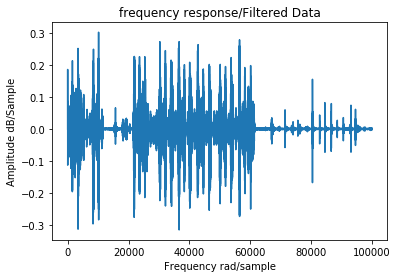

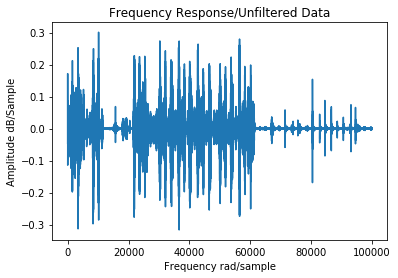

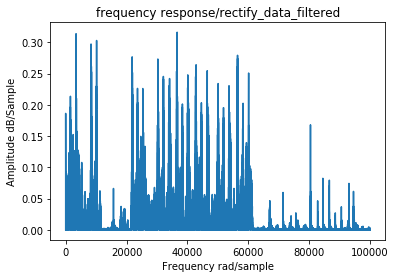

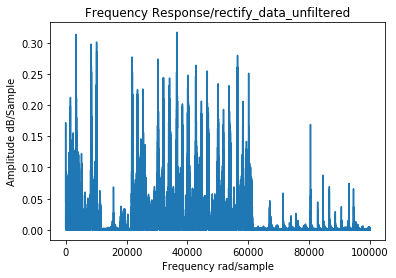

In [5]:
# The Filtered Audio
plt.figure()
plt.plot(audio_filtered[0:10**5])
plt.ylabel('Amplitude dB/Sample')
plt.xlabel('Frequency rad/sample')
plt.title('frequency response/Filtered Data')

# the Unfiltered Audio
plt.figure()
plt.plot(audio_array[0:10**5])
plt.ylabel('Amplitude dB/Sample')
plt.xlabel('Frequency rad/sample')           
plt.title('Frequency Response/Unfiltered Data')



# The recified Filtered Audio
plt.figure()
plt.plot(rectify_data_filtered[0:10**5])
plt.ylabel('Amplitude dB/Sample')
plt.xlabel('Frequency rad/sample')
plt.title('frequency response/rectify_data_filtered')

# the rectified Unfiltered Audio
plt.figure()
plt.plot(rectify_data_unfiltered[0:10**5])
plt.ylabel('Amplitude dB/Sample')
plt.xlabel('Frequency rad/sample')           
plt.title('Frequency Response/rectify_data_unfiltered')

## Graph The Frequency Response 

The plotting for the frequency response, showing the critical points of the w,h using the variables a and b from matlab file import. 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  # Remove the CWD from sys.path while we load stuff.


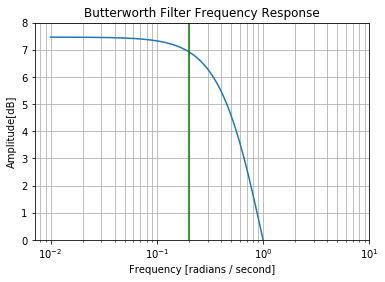

In [6]:
#Note: The cut frequency is equal to 0.5 
b = signaldata['b'][0]; a = signaldata['a'][0]
w,h = signal.freqs(b,a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth Filter Frequency Response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude[dB]')
plt.ylim((0,8))
plt.xlim((-10,10))
plt.margins(0,0.01)
plt.grid(which='both',axis='both')
plt.axvline(0.2,color ='green') #cutoff frequency
plt.show()

## Root Mean Square and Threshold 

Function that determine RMS and can return values:rms,mean,root,square. rms is used to dertmine the Threshold. Find the Threshold of the filtered data: find the RMS and multiply by j which is 3, or 4 or 5 depend. mean is equal to zero create a function that clacualte the RMS 

In [7]:
def RMS_value(rectify_data_filtered):
    # intiate the coeffieciants for [square,mean,root]
    square = 0.0 
    mean = 0.0
    root = 0.0 
    for i in range (0,len(rectify_data_filtered)):
        square += (audio_filtered[i]**2)
    mean = square / (float)(len(rectify_data_filtered))
    rms = math.sqrt(mean)  
    return rms

threshold = 2 * RMS_value(rectify_data_filtered)
print(threshold)

0.038039484662064124


## Plot wav.audio including the threshold 

Text(0.5, 1.0, 'filtered freq_response/zoomIN')

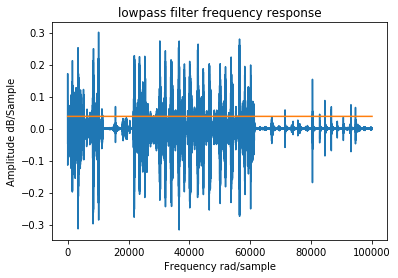

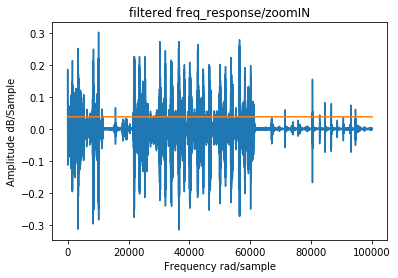

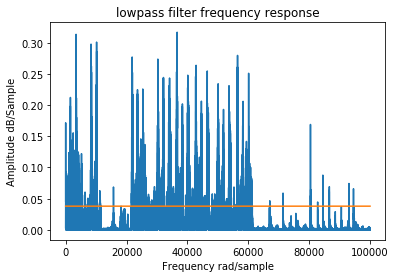

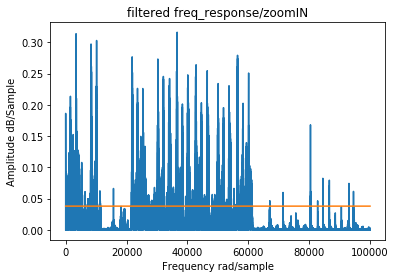

In [8]:
plt.figure()
plt.plot(audio_array[0:10**5])
plt.plot(np.linspace(5,len(audio_array[0:10**5]),len(audio_array[0:10**5])),[threshold]*len(audio_array[0:10**5]))
plt.ylabel('Amplitude dB/Sample')
plt.xlabel('Frequency rad/sample')
plt.title('lowpass filter frequency response')

plt.figure()
plt.plot(audio_filtered[0:100000])
plt.plot(np.linspace(5,len(audio_filtered[0:100000]),len(audio_filtered[0:100000])),[threshold]*len(audio_filtered[0:100000]))
plt.ylabel('Amplitude dB/Sample')
plt.xlabel('Frequency rad/sample')
plt.title('filtered freq_response/zoomIN')


plt.figure()
plt.plot(rectify_data_unfiltered[0:10**5])
plt.plot(np.linspace(5,len(rectify_data_unfiltered[0:10**5]),len(rectify_data_unfiltered[0:10**5])),[threshold]*len(rectify_data_unfiltered[0:10**5]))
plt.ylabel('Amplitude dB/Sample')
plt.xlabel('Frequency rad/sample')
plt.title('lowpass filter frequency response')

plt.figure()
plt.plot(rectify_data_filtered[0:100000])
plt.plot(np.linspace(5,len(rectify_data_filtered[0:100000]),len(rectify_data_filtered[0:100000])),[threshold]*len(rectify_data_filtered[0:100000]))
plt.ylabel('Amplitude dB/Sample')
plt.xlabel('Frequency rad/sample')
plt.title('filtered freq_response/zoomIN')

# Create an array of 0 and 1 

[0 1 0 ... 0 0 0]


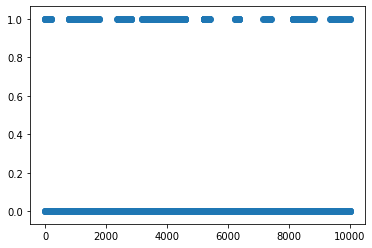

In [9]:

def index_abv_thr(x,th):
    idx_abv_th = np.array([0]*len(x))
    for i in range(len(x)):
        if x[i] >= th:
            idx_abv_th[i] = 1
    return idx_abv_th

bsing_array = index_abv_thr(rectify_data_filtered,threshold)
print(bsing_array)
plt.figure()
num_samples = 10000
plt.scatter(np.linspace(0, len(bsing_array[0:num_samples]), num=len(bsing_array[0:num_samples])), bsing_array[0:num_samples])



In [1]:
# #3000 samples per second 4500 sample per 1.5 second 
# num_zeros_th = 4500 # seconds * sampling rate
# # OUTPUT: Array[N motifs x Start_sample x End_sample]
# motif_times = []
# start_idx = None
# end_idx = None
# zero_counter = 0

# for i in range(len(bsing_array)):
    
# #when start-indx == None 
#     if bsing_array[i] == 1:  # if above threshold
#         zero_counter = 0  #counter that counts elements of 1 
#         if start_idx == None: #if just started counting elements 
#             start_idx = i  # Start of current event
            
# #when start-indx != None 

# #             if start_idx != None:
# #                 end_idx = len(bsing_array[i])
# #                 motif_times.append(start_idx, end_idx)
                        
#     if bsing_array[i] == 0 and start_idx != None:  # if below threshold
#         if zero_counter == 0:
#             end_idx = i  
#         zero_counter += 1

#         if zero_counter == num_zeros_th:
#             print(motif_times.append([start_idx, end_idx]))
#             start_idx = None
#             end_idx = None
            
# if start_idx != None:
#     end_idx = len(bsing_array)
#     motif_times.append(start_idx, end_idx)

## Join periods that belong to the same motif

In [13]:
y_above_th = np.zeros((1, len(y)))
# we have y and y_above. 
# y have the array of filtered data 
# y_above is an imaginary array made from zeros. 



def stimulate(y_above_th):
    for i in range (1,len(y)):
        if y[i] >= threshold:
            y_above_th = 1 

        return y_above_th

# plt.plot(stimuate(y)[0:100000])
# plt.plot(np.linspace(5,len(y[0:100000]),len(y[0:100000])),[threshold]*len(y[0:100000]))



In [ ]:
"""A while loop that create seperate the 1 and 0 in individual arrays """

def once_num (number):
    i = 0 
    while i < len(number):
        if 
        n = number[i]
        startIndex = i 
        while i < len(numbe r) - 1 and number[i] == number[i+1]:
            if number[i] == 1:
                motif.append()
            i = i + 1
        endIndex = i
        print("{0}>>{1}".format(n,[startIndex,endIndex]))
        i = i + 1
once_num(y_above_th)

"in order to check the result, plot both"

In [ ]:
"""this code is supposed to be for finding the height and width of the peaks
however, it is not giving the result that is expected"""

# one way is to find the peak values as well as the width of each stimulus. 
from scipy.signal import chirp, find_peaks, peak_widths
import matplotlib.pyplot as plt 

peaks, _ = find_peaks(y[0:100])
result_half = peak_widths(y, peaks, rel_height=0.5)


result_full = peak_widths(y,peaks,rel_height=1)
result_full[0]
result_half[0]

plt.plot(y[0:100])
plt.plot(peaks[0:100], y[peaks][0:100],"x")
# plt.hlines(*result_half[1:], color="C2")
# plt.hlines(*result_full[1:],color= "c3")
plt.show()